# Taller V: Detectando el Iris

Estimados estudiantes, en este taller la tarea es detectar el iris de un ojo a partir de una imágen utilziando la transformada de Hough para detectar circulos.  Para la detección utilicen almenos dos imagenes del dataset que pueden encontrar en este [link](https://www.kaggle.com/datasets/naureenmohammad/mmu-iris-dataset). 

Para la detección de bordes pueden utilizar el el filtro canny, con funciones que ya esten en opencv. Sin embargo la transformada hough si quiero que la implementen desde cero.

El taller lo pueden desarrollar en grupos de máximo 3 personas. La entrega de este taller es para el Viernes 22 de Abril a las 11:59 p.m utilizando el enlace de e-aulas.

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import itertools
import copy

In [4]:
def plot_images(original, filtered):
    fig, ax = plt.subplots(1,2, figsize=(15,15))
    ax[0].imshow(original, cmap = 'gray')
    ax[0].set_title('Imagen original')
    ax[1].imshow(filtered, cmap = 'gray')
    ax[1].set_title('Imagen filtrada')

In [7]:
img1 = cv2.imread('ojo1.bmp')
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)

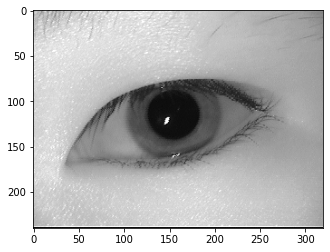

In [8]:
plt.imshow(img1, cmap='gray')

In [5]:
# Aplicar suavizado Gaussiano
img1_gaussiana = cv2.GaussianBlur(img1, (9,9), 0)

In [6]:
img1_canny = cv2.Canny(img1_gaussiana, 10, 100)

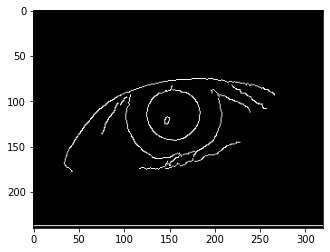

In [7]:
plt.imshow(img1_canny, cmap='gray')

In [8]:
ret, img1_thresh = cv2.threshold(img1, 100, 255, cv2.THRESH_BINARY)
img1_gaussiana2 = cv2.GaussianBlur(img1_thresh, (9,9), 0)

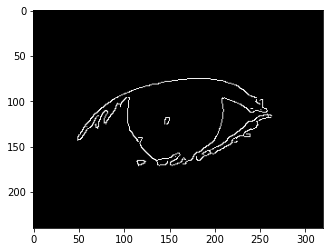

In [9]:
img1_canny2 = cv2.Canny(img1_gaussiana2, 100, 200)
plt.imshow(img1_canny2, cmap='gray')

In [10]:
def hough_transform(img, r_vals):
    n, m = img.shape
    r_min, r_max = r_vals
    
    idxs = np.where(img == 255)
    accumulator = np.zeros((n,m,r_max-r_min))

    for r in range(r_min, r_max):
        r_idx = r - r_min
        for x,y in zip(idxs[0], idxs[1]):
            aux_matrix = np.zeros((n,m))
            circle = cv2.circle(aux_matrix, (x,y), r, (255,255,255), 1)
            circumference = np.where(circle == 255)
            for i,j in zip(circumference[0], circumference[1]):
                accumulator[i,j,r_idx] += 1
    return accumulator

In [11]:
r_vals1 = (10,40)
accum1 = hough_transform(img1_canny, r_vals1)
Xc1, Yc1, rc1 = np.unravel_index(np.argmax(accum1, axis=None), accum1.shape)

In [12]:
r_vals2 = (30,80)
accum2 = hough_transform(img1_canny2, r_vals2)
Xc2, Yc2, rc2 = np.unravel_index(np.argmax(accum2, axis=None), accum2.shape)

In [18]:
img1 = cv2.imread('ojo1.bmp')
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)

In [19]:
image1 = cv2.circle(img1.copy(), (Xc1, Yc1), rc1+r_vals1[0], (255,0,0), 1)
image1 = cv2.circle(image1, (Xc2, Yc2), rc2+r_vals2[0], (255,0,0), 1)

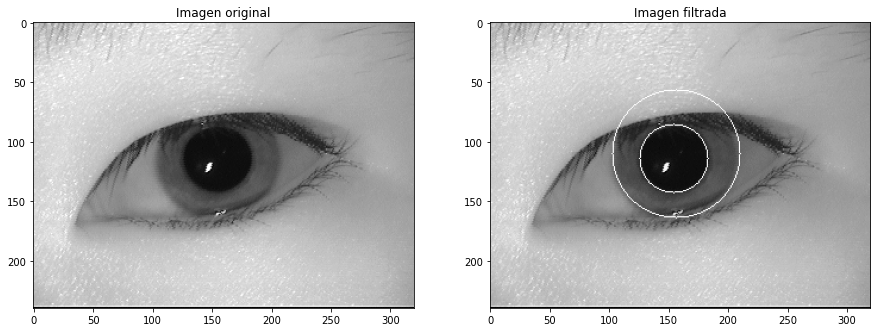

In [20]:
plot_images(img1, image1)